In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from scipy.cluster.hierarchy import dendrogram, linkage
from imblearn.over_sampling import SMOTE

In [7]:
df = pd.read_csv("bank.csv", delimiter=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
df['y_binary'] = df['y'].map({'yes': 1, 'no': 0})

#--------------------Job---------------------------
most_freq_job = df["job"].mode()[0]

df["job"] = df["job"].replace("unknown", most_freq_job)

df["job"].unique()

#--------------------Education---------------------
education_order = ["primary", "secondary", "tertiary"]

df["education"] = df["education"].replace("unknown", np.nan)

most_frequent = df["education"].mode()[0]

df["education"] = df["education"].replace(np.nan, most_frequent)

encoder = OrdinalEncoder(categories=[education_order])
df["education"] = encoder.fit_transform(df[["education"]])

In [9]:
#---------------------Contact-------------------
most_freq_job = df["contact"].mode()[0]

df["contact"] = df["contact"].replace("unknown", most_freq_job)

df["contact"].unique()

array(['cellular', 'telephone'], dtype=object)

In [10]:
#---------------------Default-------------------
df.drop("default", axis=1, inplace=True)

#---------------------Duration------------------
df.drop("duration", axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   float64
 4   balance    4521 non-null   int64  
 5   housing    4521 non-null   object 
 6   loan       4521 non-null   object 
 7   contact    4521 non-null   object 
 8   day        4521 non-null   int64  
 9   month      4521 non-null   object 
 10  campaign   4521 non-null   int64  
 11  pdays      4521 non-null   int64  
 12  previous   4521 non-null   int64  
 13  poutcome   4521 non-null   object 
 14  y          4521 non-null   object 
 15  y_binary   4521 non-null   int64  
dtypes: float64(1), int64(7), object(8)
memory usage: 565.2+ KB


In [12]:
cols = ["housing", "loan", "month", "poutcome", "contact", "marital", "job"]
df = pd.get_dummies(df, columns=cols, drop_first=True, dtype=int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4521 non-null   int64  
 1   education          4521 non-null   float64
 2   balance            4521 non-null   int64  
 3   day                4521 non-null   int64  
 4   campaign           4521 non-null   int64  
 5   pdays              4521 non-null   int64  
 6   previous           4521 non-null   int64  
 7   y                  4521 non-null   object 
 8   y_binary           4521 non-null   int64  
 9   housing_yes        4521 non-null   int64  
 10  loan_yes           4521 non-null   int64  
 11  month_aug          4521 non-null   int64  
 12  month_dec          4521 non-null   int64  
 13  month_feb          4521 non-null   int64  
 14  month_jan          4521 non-null   int64  
 15  month_jul          4521 non-null   int64  
 16  month_jun          4521 

In [13]:
df.dtypes.value_counts()

int64      36
float64     1
object      1
Name: count, dtype: int64

In [14]:
df.drop("y", axis=1, inplace=True)

In [15]:
y, X = df["y_binary"], df.drop("y_binary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=57)

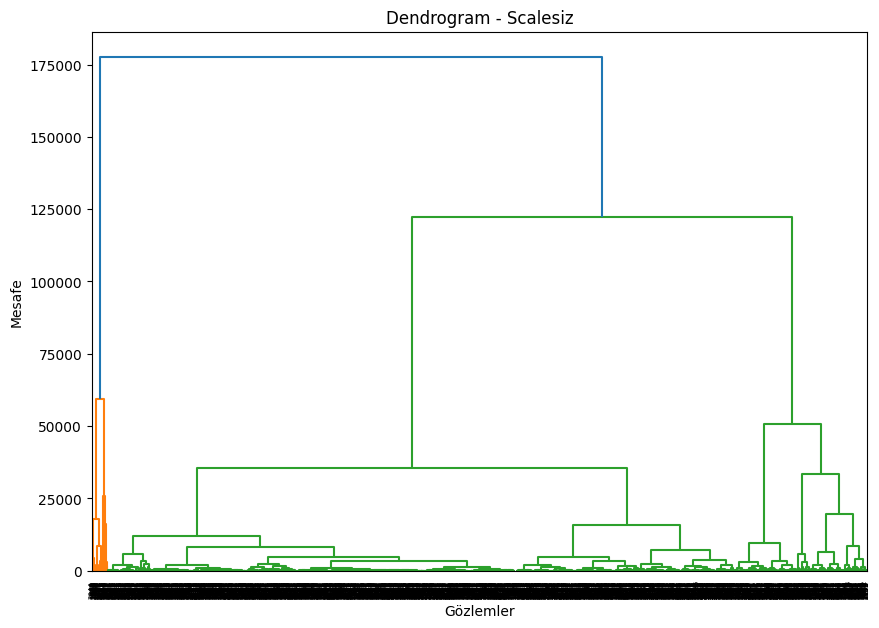

In [16]:
values_train = X_train.values

linked = linkage(values_train, method='ward')


plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram - Scalesiz")
plt.xlabel("Gözlemler")
plt.ylabel("Mesafe")
plt.show()

In [17]:
scaler = StandardScaler()

num_cols = ["age", "balance", "day", "campaign", "pdays", "previous"]

X_train_scaled = X_train.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])

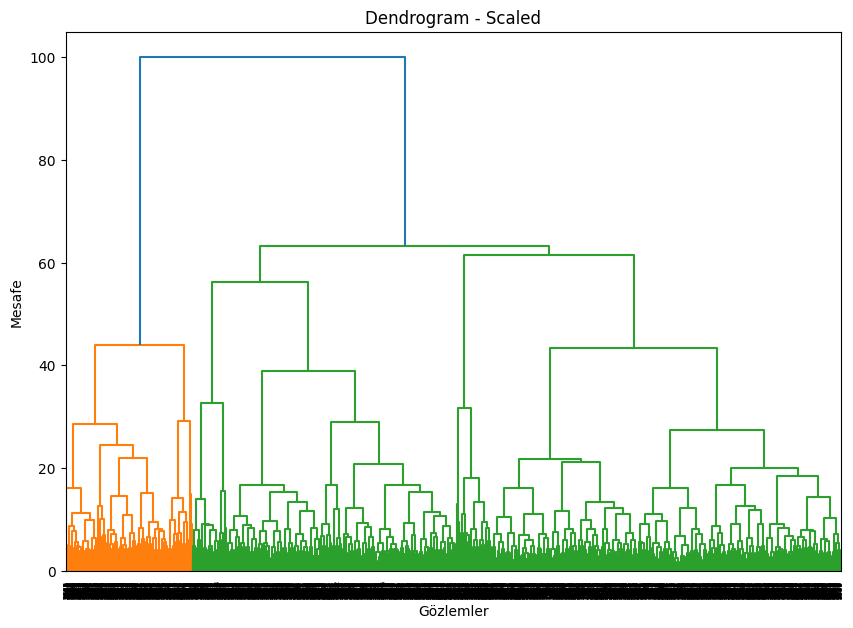

In [18]:
linked_scaled = linkage(X_train_scaled.values, method='ward')


plt.figure(figsize=(10, 7))
dendrogram(linked_scaled)
plt.title("Dendrogram - Scaled")
plt.xlabel("Gözlemler")
plt.ylabel("Mesafe")
plt.show()

In [19]:
df["y_binary"].value_counts()

y_binary
0    4000
1     521
Name: count, dtype: int64

In [20]:
smote = SMOTE(random_state=28)

X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print(y_train.value_counts())
print(y_train_res.value_counts())

y_binary
0    3199
1     417
Name: count, dtype: int64
y_binary
0    3199
1    3199
Name: count, dtype: int64


In [21]:
model = LogisticRegression(random_state=57, max_iter=1000)

model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=57)

In [22]:
X_test_scaled = X_test.copy()
num_cols = ["age", "balance", "day", "campaign", "pdays", "previous"]
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

In [23]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7845303867403315

Confusion Matrix:
 [[674 127]
 [ 68  36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       801
           1       0.22      0.35      0.27       104

    accuracy                           0.78       905
   macro avg       0.56      0.59      0.57       905
weighted avg       0.83      0.78      0.80       905



In [24]:
rf = RandomForestClassifier(random_state=57)
rf.fit(X_train_res, y_train_res)

y_pred = rf.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8596685082872928
Confusion Matrix:
 [[756  45]
 [ 82  22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       801
           1       0.33      0.21      0.26       104

    accuracy                           0.86       905
   macro avg       0.62      0.58      0.59       905
weighted avg       0.84      0.86      0.85       905



In [25]:
rf = RandomForestClassifier(random_state=57, class_weight="balanced")
rf.fit(X_train_res, y_train_res)

y_pred = rf.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8596685082872928
Confusion Matrix:
 [[756  45]
 [ 82  22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       801
           1       0.33      0.21      0.26       104

    accuracy                           0.86       905
   macro avg       0.62      0.58      0.59       905
weighted avg       0.84      0.86      0.85       905



In [26]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=57)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_scaled, y_train)

X_train_adasyn.shape, y_train_adasyn.shape

((6423, 36), (6423,))

In [27]:
model = LogisticRegression(random_state=57, max_iter=1000)

model.fit(X_train_adasyn, y_train_adasyn)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7823204419889502

Confusion Matrix:
 [[673 128]
 [ 69  35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       801
           1       0.21      0.34      0.26       104

    accuracy                           0.78       905
   macro avg       0.56      0.59      0.57       905
weighted avg       0.83      0.78      0.80       905



In [28]:
model = LogisticRegression(random_state=57)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8828729281767956

Confusion Matrix:
 [[790  11]
 [ 95   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       801
           1       0.45      0.09      0.15       104

    accuracy                           0.88       905
   macro avg       0.67      0.54      0.54       905
weighted avg       0.84      0.88      0.85       905



In [29]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [30]:
X_train_scaled.shape

(3616, 36)

In [31]:
class BankingModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()

        self.layer1 = nn.Linear(in_features=input_dim, out_features=64)
        self.layer2 = nn.Linear(in_features=64, out_features=32)
        self.layer3 = nn.Linear(in_features=32, out_features=16)
        self.layer4 = nn.Linear(in_features=16, out_features=8)
        self.output = nn.Linear(in_features=8, out_features=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        z = self.relu(self.layer1(x))
        z = self.relu(self.layer2(z))
        z = self.relu(self.layer3(z))
        z = self.relu(self.layer4(z))
        return self.sigmoid(self.output(z))

In [32]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [33]:
train_dataset = TensorDataset(torch.tensor(X_train_res.values, dtype=torch.float32), torch.tensor(y_train_res.values, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)

test_dataset = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=64)


model = BankingModel(36).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [34]:
def train(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in dataloader:
        X_batch ,y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()

        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        
        loss.backward()

        optimizer.step()

        total_loss += loss.item() * X_batch.size(0)

        preds = torch.round(torch.sigmoid(outputs)).float()
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)
    
    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

In [35]:
def evaluate(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            total_loss += loss.item()

            preds = torch.round(torch.sigmoid(outputs))
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

    avg_loss = total_loss / len(data_loader)
    accuracy = correct / total
    return avg_loss, accuracy


In [36]:
num_epochs = 500
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = evaluate(model, test_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} - "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")


Epoch 1/500 - Train Loss: 0.6921, Train Acc: 0.5002 - Val Loss: 0.7228, Val Acc: 0.6928
Epoch 2/500 - Train Loss: 0.6643, Train Acc: 0.5014 - Val Loss: 0.7290, Val Acc: 0.7116
Epoch 3/500 - Train Loss: 0.6457, Train Acc: 0.5113 - Val Loss: 0.7169, Val Acc: 0.7602
Epoch 4/500 - Train Loss: 0.6329, Train Acc: 0.5599 - Val Loss: 0.7693, Val Acc: 0.6972
Epoch 5/500 - Train Loss: 0.6152, Train Acc: 0.6499 - Val Loss: 0.8246, Val Acc: 0.6652
Epoch 6/500 - Train Loss: 0.5849, Train Acc: 0.7645 - Val Loss: 0.7558, Val Acc: 0.7724
Epoch 7/500 - Train Loss: 0.5821, Train Acc: 0.7929 - Val Loss: 0.7932, Val Acc: 0.7238
Epoch 8/500 - Train Loss: 0.5835, Train Acc: 0.8060 - Val Loss: 0.8394, Val Acc: 0.6519
Epoch 9/500 - Train Loss: 0.5815, Train Acc: 0.8082 - Val Loss: 0.7346, Val Acc: 0.8044
Epoch 10/500 - Train Loss: 0.5824, Train Acc: 0.8049 - Val Loss: 0.7995, Val Acc: 0.7193
Epoch 11/500 - Train Loss: 0.5798, Train Acc: 0.8138 - Val Loss: 0.7803, Val Acc: 0.7514
Epoch 12/500 - Train Loss: 0.5

In [37]:
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


Test Loss: 0.7808, Test Accuracy: 0.7569


In [38]:
from sklearn.metrics import classification_report

def metrics_report(model, data_loader, device):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            outputs = model(X_batch)
            probs = torch.sigmoid(outputs)
            preds = (probs > 0.5).float()

            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    print(classification_report(y_true, y_pred, target_names=["No", "Yes"]))



metrics_report(model, test_loader, device)



              precision    recall  f1-score   support

          No       0.88      0.84      0.86       801
         Yes       0.09      0.12      0.11       104

    accuracy                           0.76       905
   macro avg       0.49      0.48      0.48       905
weighted avg       0.79      0.76      0.77       905



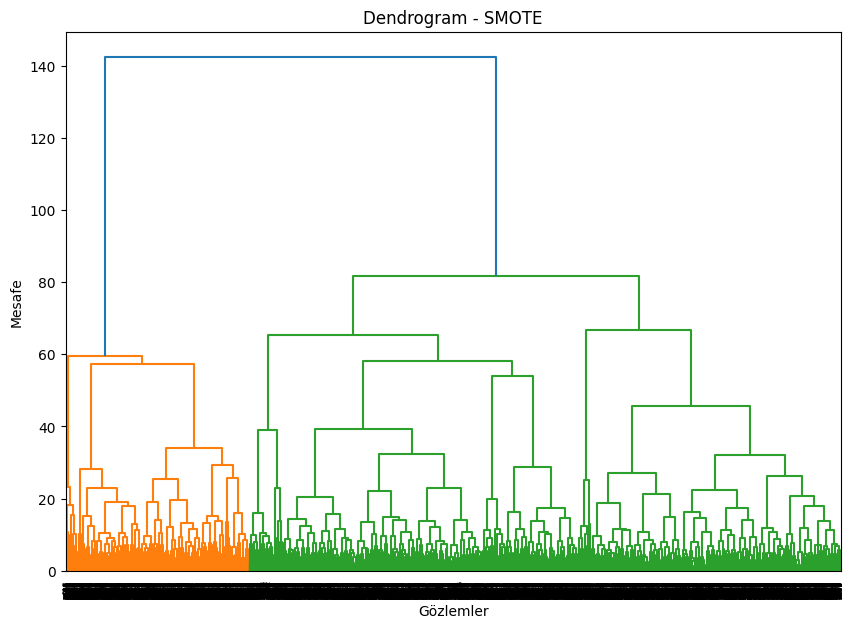

In [39]:
linked_smote = linkage(X_train_res.values, method='ward')


plt.figure(figsize=(10, 7))
dendrogram(linked_smote)
plt.title("Dendrogram - SMOTE")
plt.xlabel("Gözlemler")
plt.ylabel("Mesafe")
plt.show()